In [1]:
import pandas as pd
import numpy as np

In [19]:
dataset = pd.read_csv(r"C:\Users\Suchana Hazra\OneDrive\Desktop\datasets\titanic.csv")

In [20]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [25]:
dependent = dataset.Survived

In [27]:
independent = dataset.drop(['Survived'],axis='columns')

In [28]:
dependent

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [29]:
independent

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,Male,22.0,1,0,7.2500,3
1,2,1,female,38.0,1,0,71.2833,1
2,3,3,female,26.0,0,0,7.9250,3
3,4,1,female,35.0,1,0,53.1000,3
4,5,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
884,887,2,Male,27.0,0,0,13.0000,3
885,888,1,female,19.0,0,0,30.0000,3
886,889,3,female,60.0,1,2,23.4500,3
887,890,1,Male,26.0,0,0,30.0000,1


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
independent['sex_n'] = le.fit_transform(independent['Sex'])

In [36]:
independent

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_n
0,1,3,Male,22.0,1,0,7.2500,3,0
1,2,1,female,38.0,1,0,71.2833,1,1
2,3,3,female,26.0,0,0,7.9250,3,1
3,4,1,female,35.0,1,0,53.1000,3,1
4,5,3,Male,35.0,0,0,8.0500,3,0
...,...,...,...,...,...,...,...,...,...
884,887,2,Male,27.0,0,0,13.0000,3,0
885,888,1,female,19.0,0,0,30.0000,3,1
886,889,3,female,60.0,1,2,23.4500,3,1
887,890,1,Male,26.0,0,0,30.0000,1,0


In [37]:
independent = independent.drop(['Sex'],axis='columns')

In [38]:
independent

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,sex_n
0,1,3,22.0,1,0,7.2500,3,0
1,2,1,38.0,1,0,71.2833,1,1
2,3,3,26.0,0,0,7.9250,3,1
3,4,1,35.0,1,0,53.1000,3,1
4,5,3,35.0,0,0,8.0500,3,0
...,...,...,...,...,...,...,...,...
884,887,2,27.0,0,0,13.0000,3,0
885,888,1,19.0,0,0,30.0000,3,1
886,889,3,60.0,1,2,23.4500,3,1
887,890,1,26.0,0,0,30.0000,1,0


In [39]:
independent.columns[independent.isna().any()]

Index([], dtype='object')

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size = 0.25)

In [56]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,sex_n
18,19,3,31.0,1,0,18.0000,3,1
133,135,2,25.0,0,0,13.0000,3,0
200,202,3,60.0,8,2,69.5500,3,0
624,626,1,61.0,0,0,32.3208,3,0
258,260,2,50.0,0,1,26.0000,3,1
...,...,...,...,...,...,...,...,...
477,479,3,22.0,0,0,7.5208,3,0
780,782,1,17.0,1,0,57.0000,3,1
413,415,3,44.0,0,0,7.9250,3,0
520,522,3,22.0,0,0,7.8958,3,0


In [57]:
len(x_train)

666

In [58]:
len(x_test)

223

In [59]:
len(independent)

889

In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [61]:
model.score(x_test,y_test)

0.8116591928251121

In [62]:
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
cmat = confusion_matrix(y_pred,y_test)

In [64]:
cmat

array([[105,  25],
       [ 17,  76]], dtype=int64)

In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       130
           1       0.75      0.82      0.78        93

    accuracy                           0.81       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.81      0.81       223



In [70]:
import seaborn as sb
import matplotlib.pyplot as plt

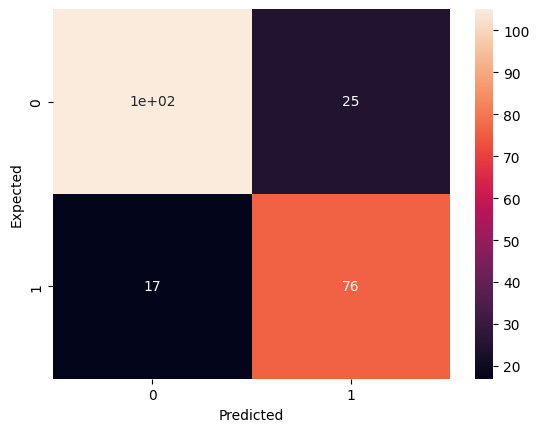

In [72]:
sb.heatmap(cmat,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show() 